In [393]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [394]:
os.chdir("E:\AI-ML\Feature Engineering - Model Selection & Tuning")

In [395]:
df = pd.read_csv('concrete.csv')

In [396]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [398]:
df.shape

(1030, 9)

# Exploratory data quality report

## 1. Univariate Analysis

In [399]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [400]:
for i in list(df.columns):
    print('Number of unique values in', i, 'is',df[i].nunique())

Number of unique values in cement is 278
Number of unique values in slag is 185
Number of unique values in ash is 156
Number of unique values in water is 195
Number of unique values in superplastic is 111
Number of unique values in coarseagg is 284
Number of unique values in fineagg is 302
Number of unique values in age is 14
Number of unique values in strength is 845


In [401]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


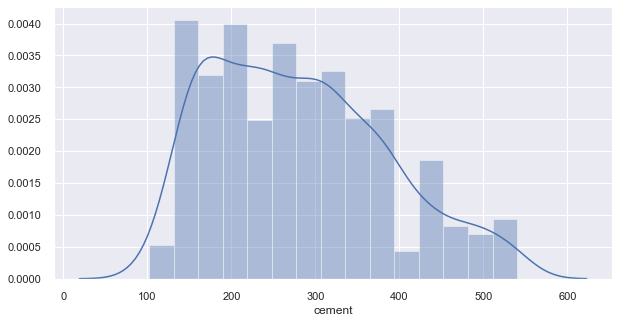

In [402]:
sns.set(color_codes = True)
plt.figure(figsize=(10,5));
sns.distplot(df['cement']);

#### we can see that 'cement' feature is positively skewed and we would try to transform it for better meodel building

#### we have no null values in any of the attribute, however we will check if any imputing is required for illogical values

In [403]:
df['cement'].unique()

array([141.3, 168.9, 250. , 266. , 154.8, 255. , 166.8, 251.4, 296. ,
       155. , 151.8, 173. , 385. , 237.5, 167. , 213.8, 336. , 190.7,
       312.7, 229.7, 228. , 236. , 132. , 331. , 310. , 304. , 425. ,
       166.1, 339. , 475. , 145.7, 313. , 178. , 165. , 277.2, 325. ,
       194.7, 246.8, 382. , 149. , 531.3, 387. , 193.5, 326. , 337.9,
       200. , 218.9, 234. , 309.9, 350. , 182. , 480. , 295.7, 233.8,
       379.5, 332.5, 237. , 238.1, 323.7, 342. , 388.6, 147.8, 290.4,
       500. , 284. , 218.2, 190.3, 116. , 277. , 376. , 273. , 212.5,
       362.6, 275.1, 139.6, 427.5, 183.9, 318.8, 252. , 149.5, 540. ,
       380. , 436. , 281. , 151.6, 326.5, 397. , 238. , 158.6, 302. ,
       192. , 155.6, 160. , 222.4, 251.8, 213.5, 446. , 133. , 122.6,
       290.2, 375. , 181.4, 298.2, 162. , 262. , 213.7, 313.3, 322. ,
       173.5, 299.8, 198.6, 286.3, 349. , 520. , 252.1, 255.5, 172.4,
       212.1, 276. , 393. , 230. , 389.9, 157. , 359. , 374. , 102. ,
       202. , 252.3,

#### It is positively skewed, we will check for outliers later and deal with it if required

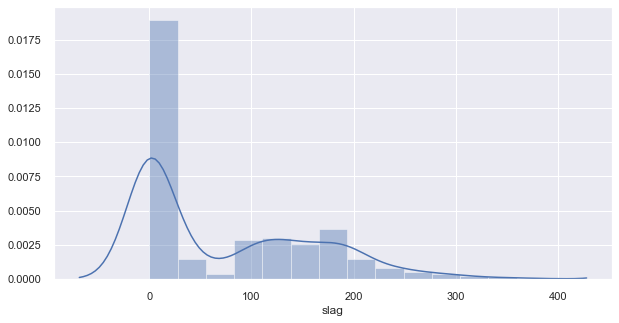

In [404]:
plt.figure(figsize=(10,5));
sns.distplot(df['slag']);

In [405]:
len(df[df['slag'] == 0])/df.shape[0]*100

45.728155339805824

#### It is highly positively skewed so it is recommended to normalize this attribute but we will normalize it after test & train split.
#### Also, we have around 46% Zero values in 'slag' attribute. It doesn't seem like a missing value and it makes sense because not in all cement mixtures every feature is necessary.
#### Cement Mixture will have different strength with different mixture quantities or values

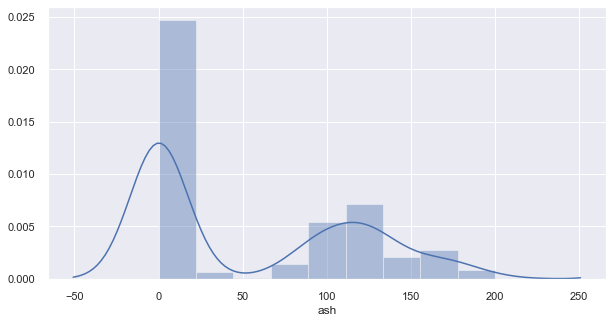

In [406]:
plt.figure(figsize=(10,5));
sns.distplot(df['ash']);

In [407]:
print('ash attribute has',round(len(df[df['ash'] == 0])/df.shape[0]*100,2),'% zero values')

ash attribute has 54.95 % zero values


#### 'ash' attribute is positively skewed and It is also recommended to normalize this attribute after splitting.

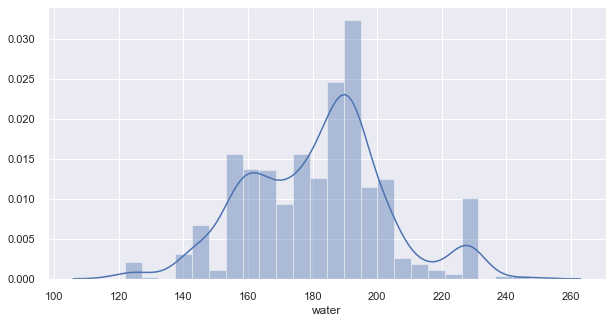

In [408]:
plt.figure(figsize=(10,5));
sns.distplot(df['water']);

#### It is not much skewed though it is multinomial curve and there is no zero value in water attribute.

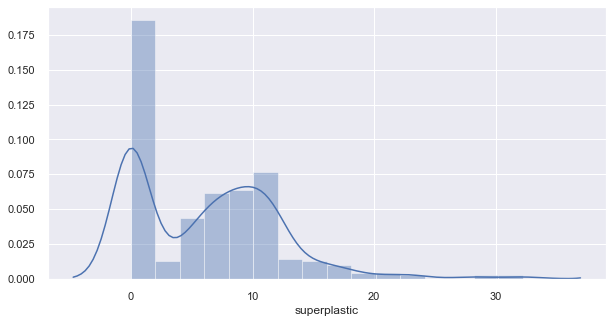

In [409]:
plt.figure(figsize=(10,5));
sns.distplot(df['superplastic']);

#### 'superplastic' is highly positively skewed with zero values as well. Let's check how many zero values this attribute contains

In [410]:
print('superplastic attribute has',round(len(df[df['superplastic'] == 0])/df.shape[0]*100,2),'% zero values')

superplastic attribute has 36.8 % zero values


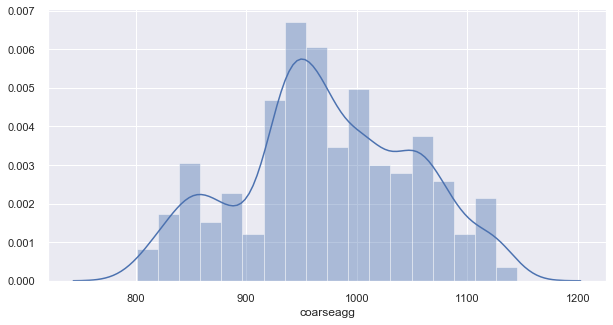

In [411]:
plt.figure(figsize=(10,5));
sns.distplot(df['coarseagg']);

#### 'coarseagg' is multinomial and is not much skewed, it has all non-zero values

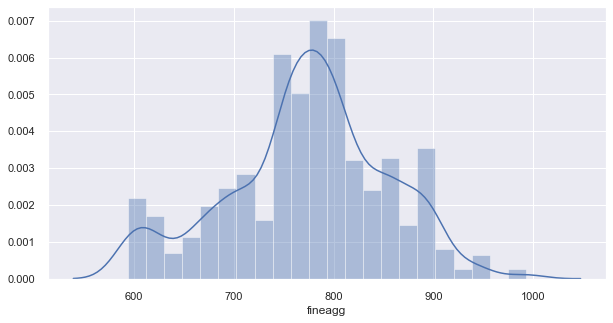

In [412]:
plt.figure(figsize=(10,5));
sns.distplot(df['fineagg']);

#### 'fineagg' is slightly positively skewed with all non-zero values

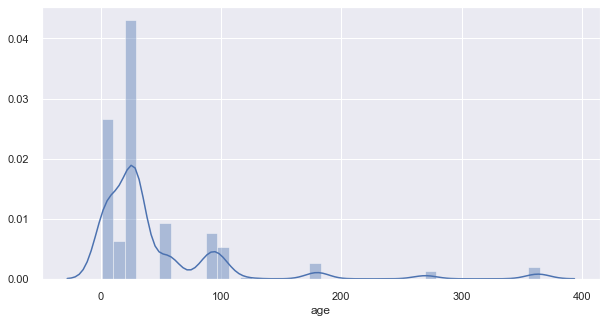

In [413]:
plt.figure(figsize=(10,5));
sns.distplot(df['age']);

#### 'age' attribute is highly positively skewed with all non-zero values

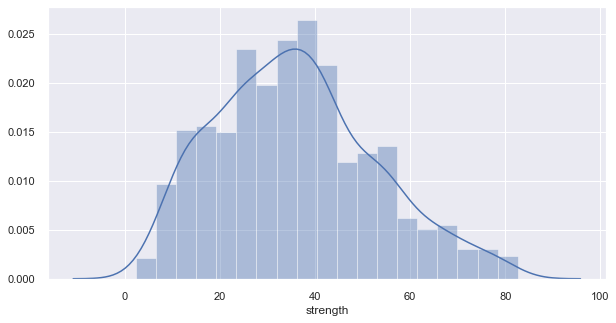

In [414]:
plt.figure(figsize=(10,5));
sns.distplot(df['strength']);

#### Our Target Variable seems like normally distributed having slight positive skewness with 845 unique values

### Checking & Dealing Outliers

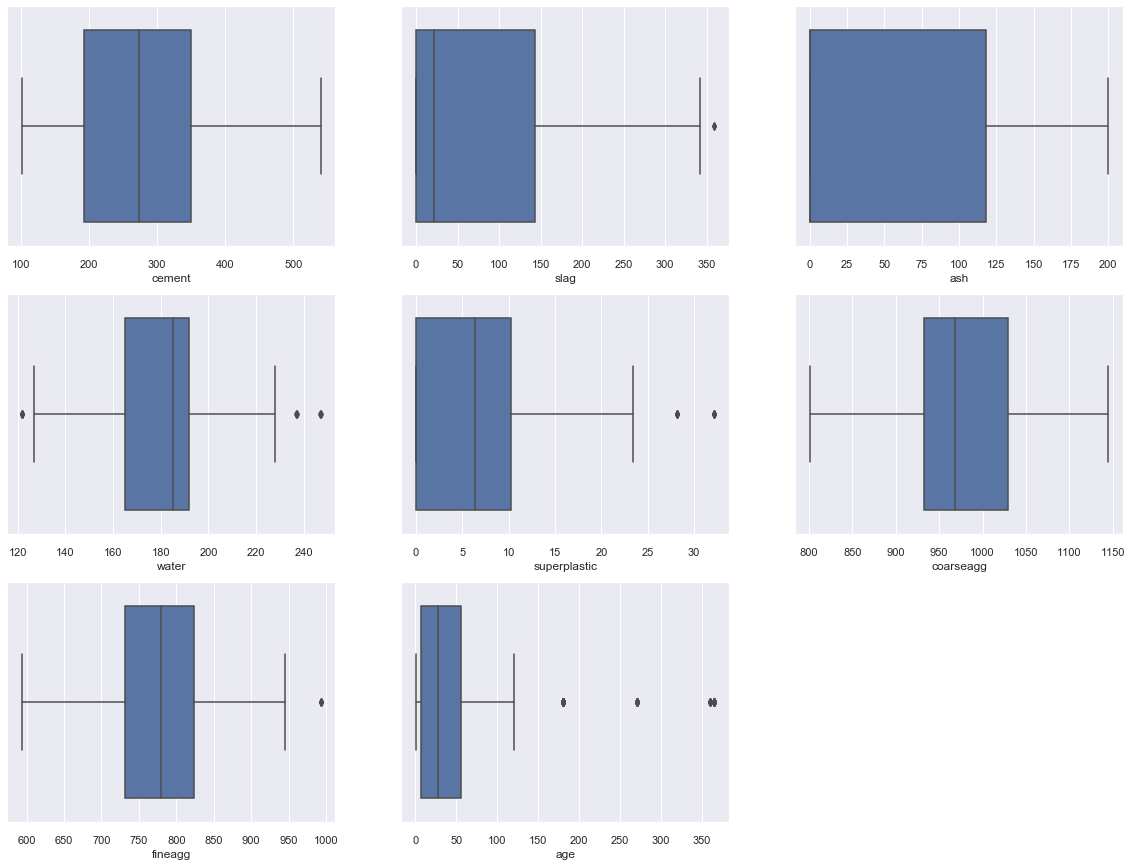

In [415]:
plt.figure(figsize=(20,15))
pos = 1
for i in df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

#### We have not much outliers in our data set, it seems we can deal with it with replacing outliers with minimum and maximum whiskers accordingly

In [416]:
for i in df.drop(columns = 'strength').columns:
    q1, q2, q3 = df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    max_whisker = q3 + 1.5*IQR
    min_whisker = q1 - 1.5*IQR
    a = df[i] > max_whisker
    b = df[i] < min_whisker
    df[i] = np.where(a, max_whisker, df[i])
    df[i] = np.where(b, min_whisker, df[i])

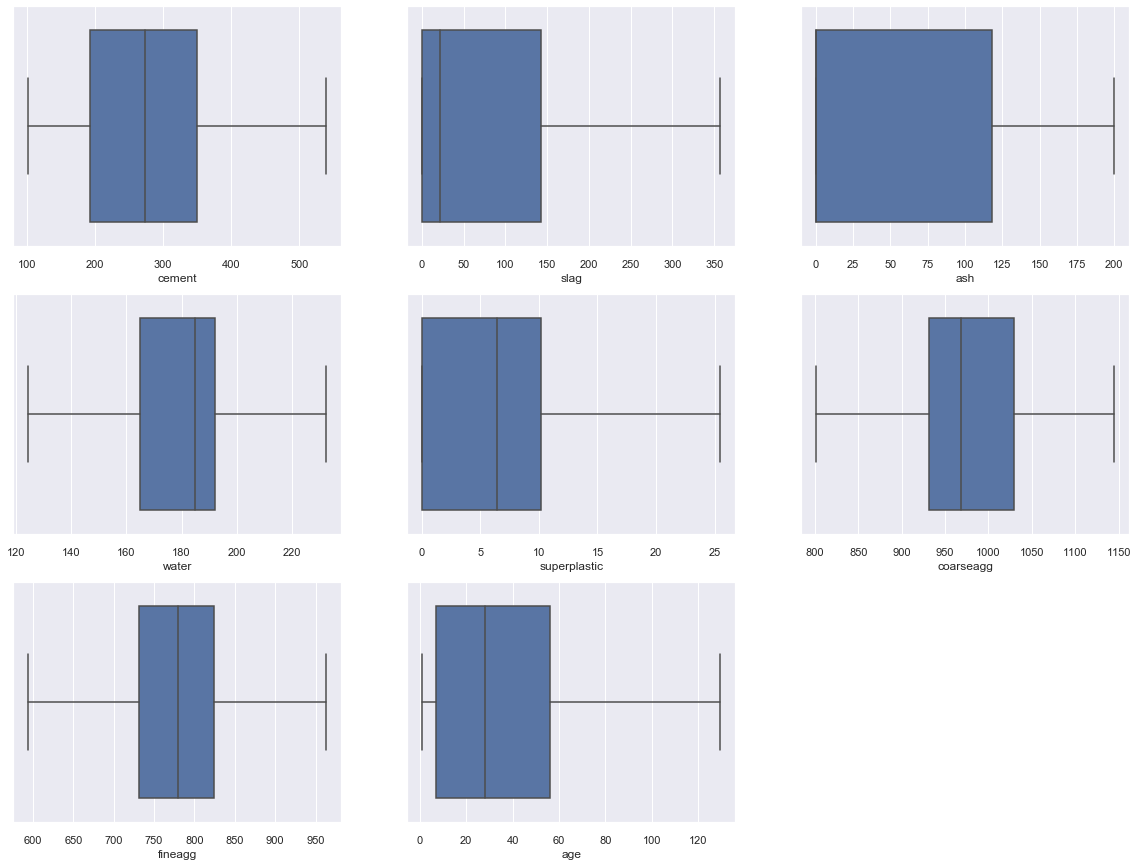

In [417]:
plt.figure(figsize=(20,15))
pos = 1
for i in df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

#### We can see that all outliers have been managed while replacing them with higher & lower whiskers respectively

## 2. Bi-variate Analysis

#### Let's start with pairplot to estimate some visual relation and corelation within attributes

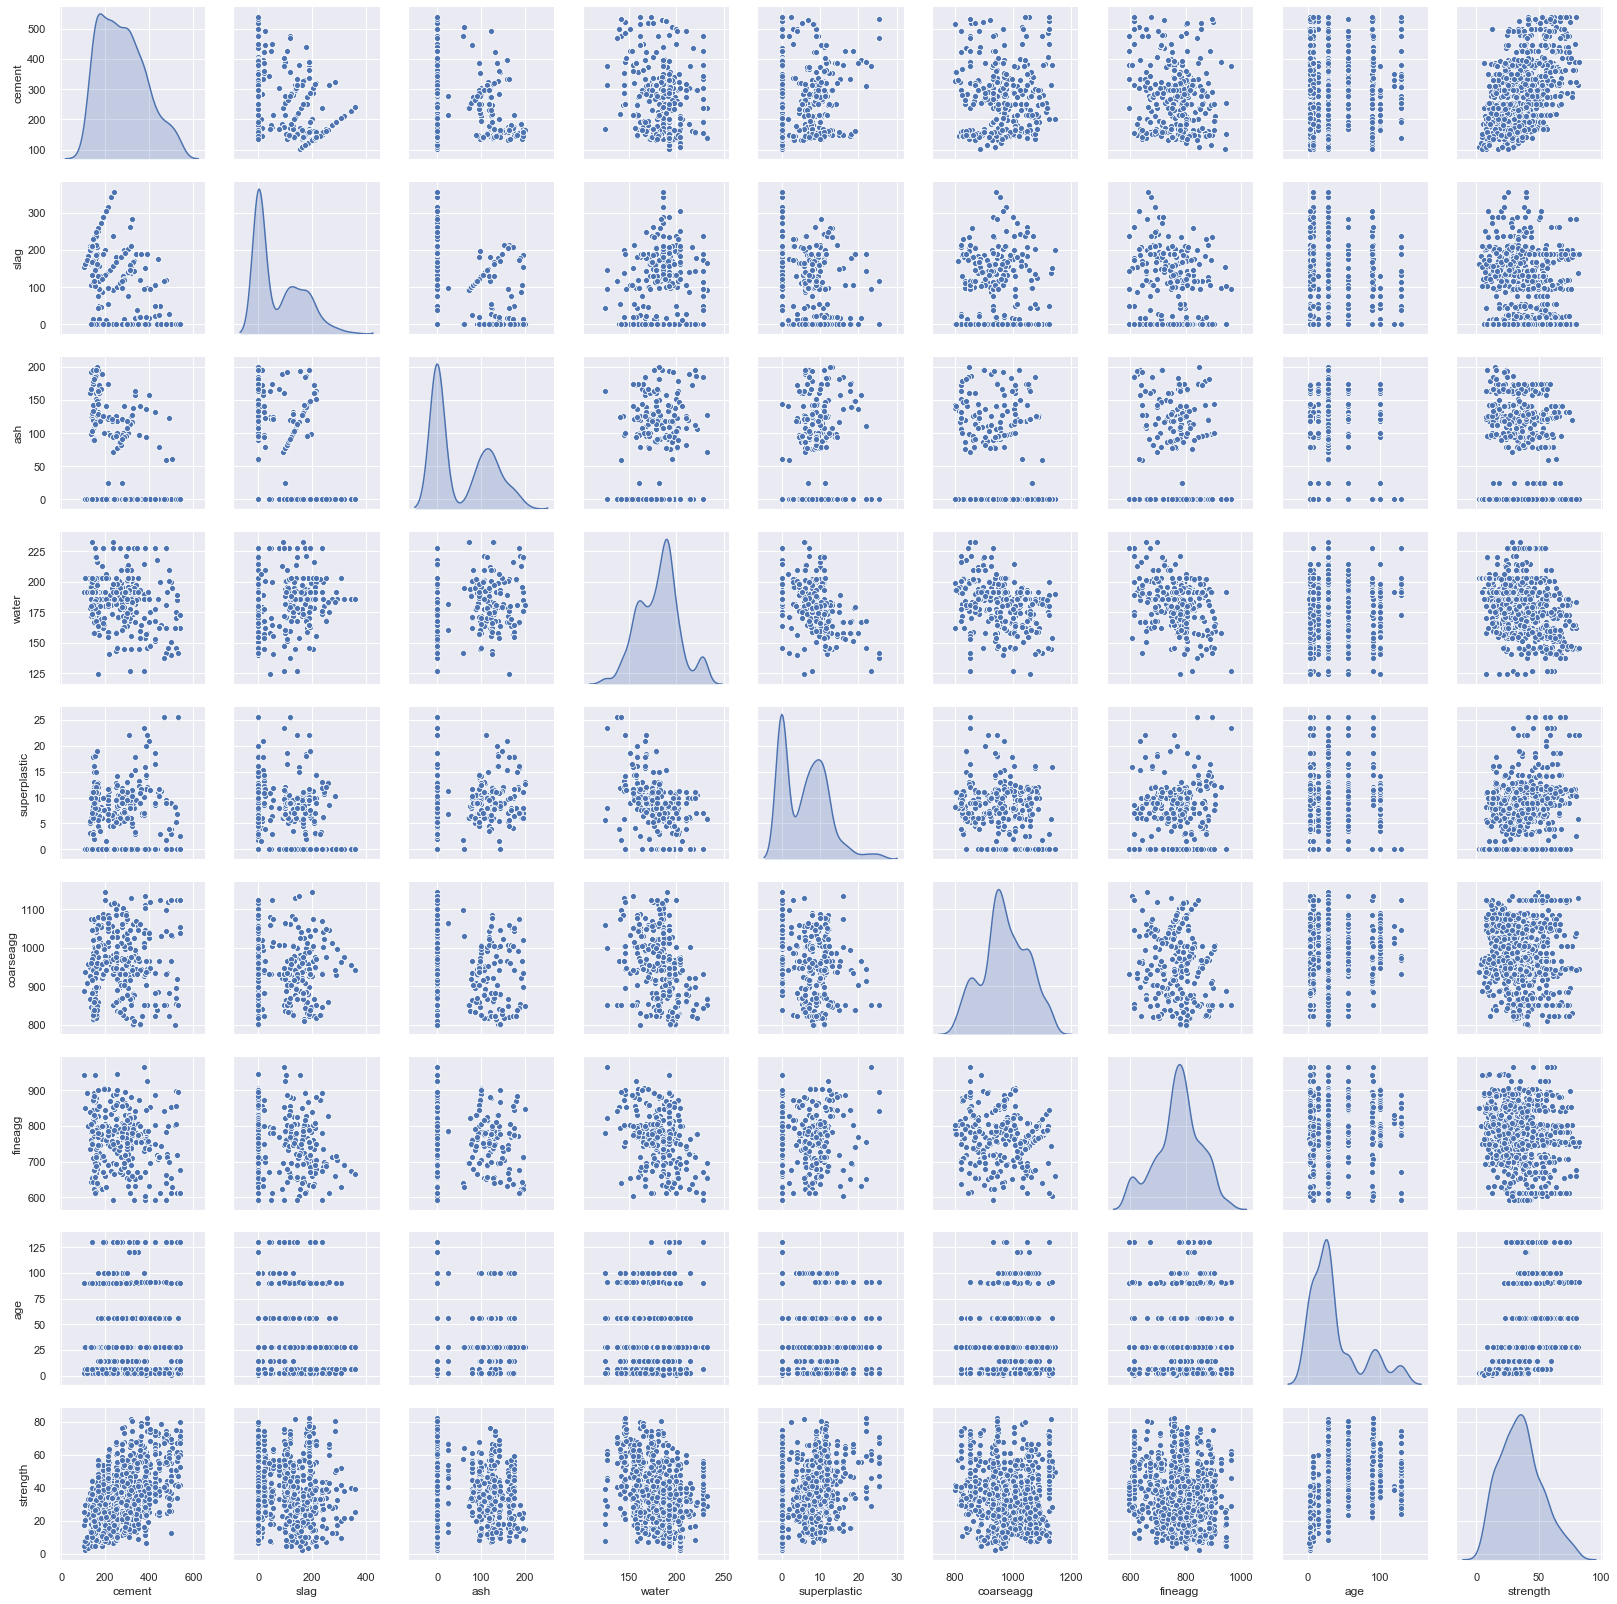

In [418]:
sns.pairplot(df, diag_kind= 'kde');
plt.show();

#### It seems like 'strength' output variable has little positive corelation with 'cement' variable. Let's try to visualize it with corelation heatmap 

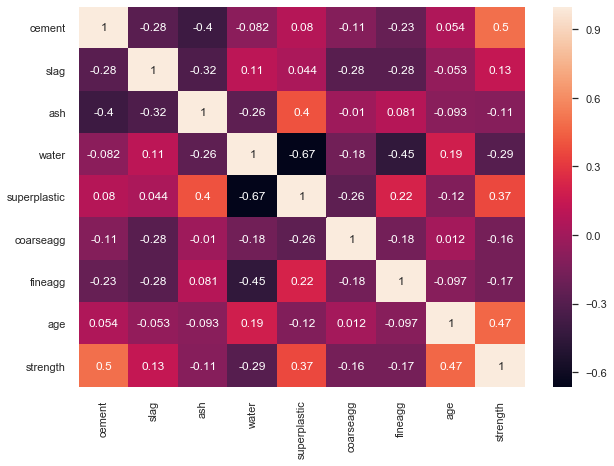

In [419]:
plt.figure(figsize=(10,7));
sns.heatmap(df.corr(), annot = True);

#### Output variable 'strength' maximum strong positive co-relation is observed with cement which is only 0.5 so it's actually not considerable co-relation.
#### Superplastic & water seems to have negative co-relation with -0.67 which is also not strongly negative co-related.
#### Apart from this, there is not much considerable co-relation b/w attributes

#### Let's carry on our one-to-one analysis b/w target variable and other attributes

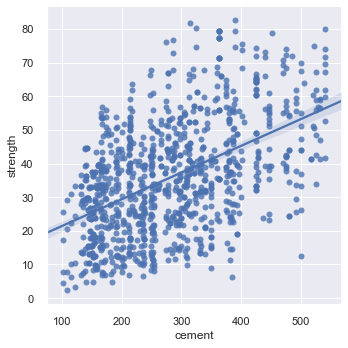

In [420]:
sns.lmplot(y="strength", x="cement", data=df);

#### Linear Relationship is plotted b/w output variable & cement variable. It is clear that data is evenly distributed across linear regression line

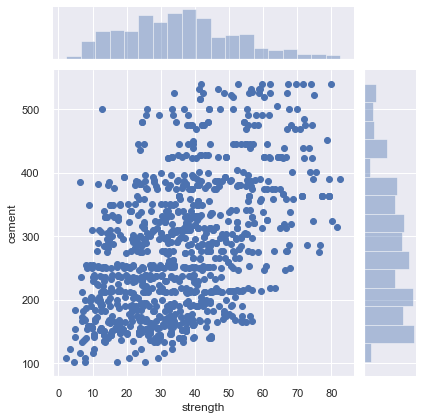

In [421]:
sns.jointplot(df['strength'], df['cement']);

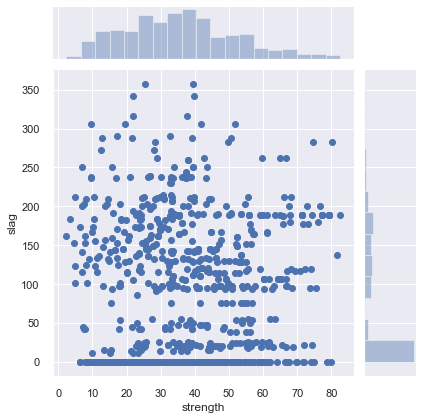

In [422]:
sns.jointplot(df['strength'], df['slag']);

#### When slag value is zero we have consistently more and more strength values. We can also observe that when 'slag' values are near to 200, we can see slight consistency in higher values of strength. Rest of the data is more likely randomly distributed

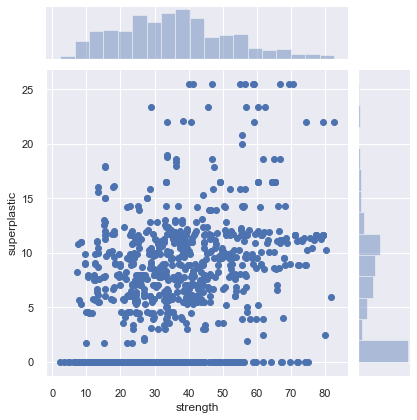

In [423]:
sns.jointplot(df['strength'], df['superplastic']);

#### We can see zero values of superplastic is again significant in consitently all range of values of strength variable. superplastic values less than 12 or 13 are contributing much with all values of strength

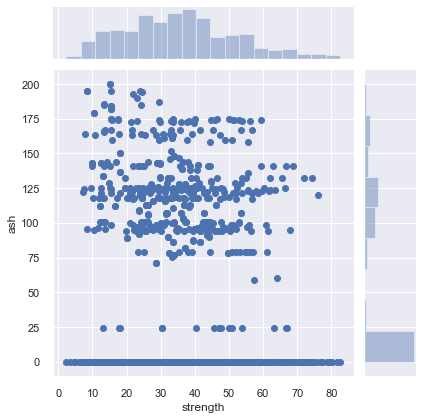

In [424]:
sns.jointplot(df['strength'], df['ash']);

#### Either 'ash' zero values or values greater than 75 are much much contributor with range of all values of 'strength' output variable

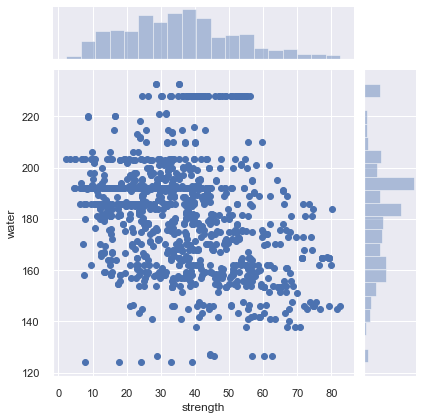

In [425]:
sns.jointplot(df['strength'], df['water']);

#### We can see that higher values of 'water' are major contributors but for most of the higher values of water we have relatively mid-level 'strength' values i.e. strength values less than 50

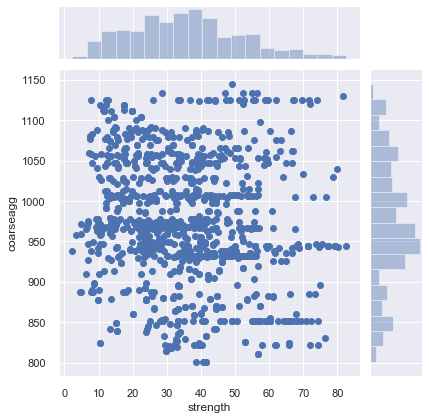

In [426]:
sns.jointplot(df['strength'], df['coarseagg']);

#### We can see that data points are distributed across all values of both target variable & 'coarseagg' variable. However, coarseagg values in b/w 920 to 970 are slightly more contributors in mid-level and less strength values i.e. strength values less than 40.

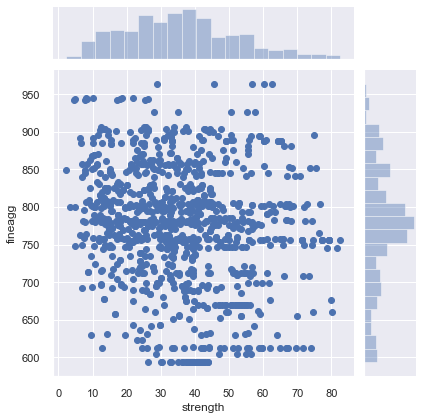

In [427]:
sns.jointplot(df['strength'], df['fineagg']);

#### Values of 'fineagg' greater than 750 are contributing much in data set. Most of the values greater than 750 have mid-level 'strength' values i.e. strength values less than 50

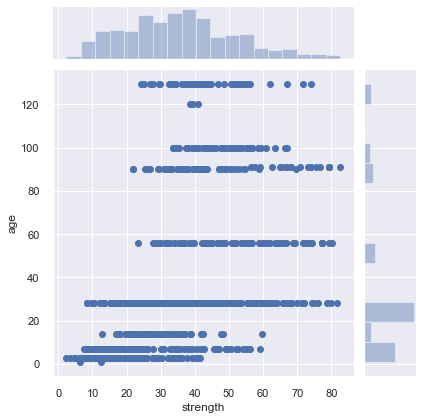

In [428]:
sns.jointplot(df['strength'], df['age']);

#### We can observe different slabs of 'age' variable with output 'strength' variable. 4 different slabs of age less than 30 & 4 different slabs with age > 30 is observed. Highest values are observed when age value is approx. 28.

## 3. Feature Engineering Techniques

#### Let's try to analyze groups of attributes together to determine if a feature can be dropped for better model building or not.
#### We'll analyze 'strength' with 'cement', 'water' & 'age' first

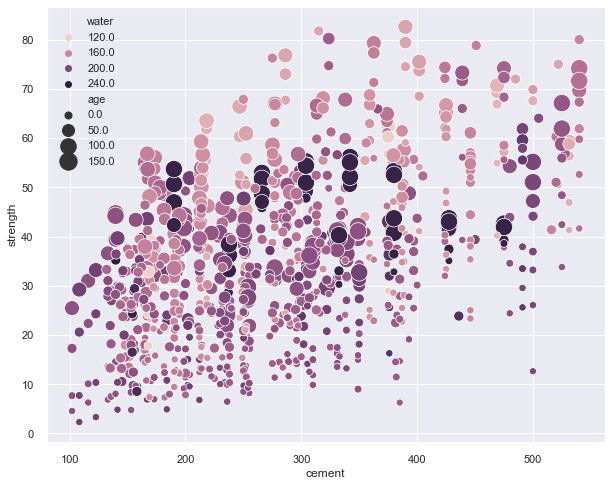

In [429]:
plt.figure(figsize=(10,8));
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=df, sizes=(50, 300));

##### strength increases as the amount of cement increases, because dots move up when we move towards right on the x-axis i.e. 'cement' axis.
##### strength increases with age as the size of dots represents the age. we have darker dots on higher values of y-axis.
##### Cement with less age requires more cement for higher strength, as the smaller age dots are moving up when we move towards right on the x-axis.
##### The older the cement is the more water it requires. Larger dots with dark colour indicate high age and more water and we can see larger dots and dark color are mostly closer to each other
##### strength increases when less water is used in mixture preparation. We can see, the dots on the lower side of strength axis are darker and the dots on higher-end are brighter

#### Now, we will analyze 'strength' with three attributes which have several zero values i.e. 'slag', 'ash' & 'superplastic' to determine mutual relationships

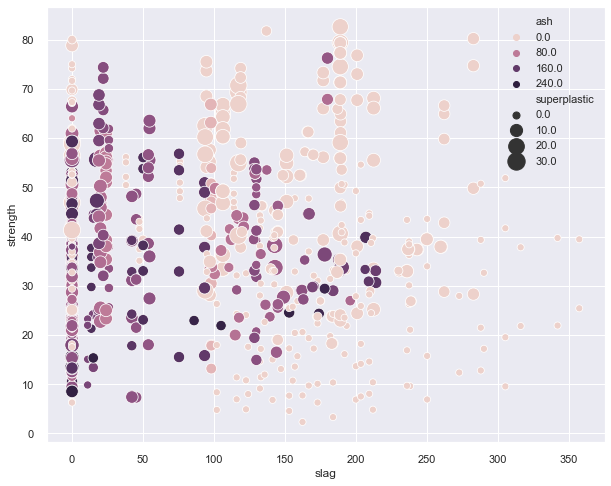

In [430]:
plt.figure(figsize=(10,8));
sns.scatterplot(y="strength", x="slag", hue="ash", size="superplastic", data=df, sizes=(50, 300));

##### Higher values of ash decreasing strength, as darker dots are concentrated in lower region of strength axis
##### slag & ash are inversely related, smaller dots increase when we move towards right i.e. slag axis (x-axis)
##### strength increases with superplastic, as darker and big dots are concentrated towards higher values of y-axis where slag values are less too

### a).
#### It is hard to find a relation b/w variables which can make it decissive to drop a feature. We earlier analyzed co-relation values at heatmap too, there is no such relation. At least, at this step we are not in a good position to drop any feature. 
#### However, we can safely say that water, cement & superplastic seems important features for upcoming model building

### b).

In [458]:
# Separating independent and dependent variables

X = df.drop("strength", axis=1)
Y = df["strength"]

In [459]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [460]:
X_train.shape,X_test.shape

((721, 8), (309, 8))

#### Before moving on to model building, we have to transform or scale our data.

In [461]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

## c).

In [462]:
# Importing models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge # Linear Regression 
lr = LinearRegression() # Lasso Regression 
lasso = Lasso() # Ridge Regression 
ridge = Ridge() # Fitting models on Training data 
lr.fit(X_train, Y_train) 
lasso.fit(X_train, Y_train) 
ridge.fit(X_train, Y_train) 
# Making predictions on Test data 
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test) 

In [463]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
result = pd.DataFrame({'Model' : ['Linear Regression'], 'RMSE' : np.sqrt(mean_squared_error(Y_test, y_pred_lr)) , 
                          'R2': r2_score(Y_test, y_pred_lr)})
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74


In [464]:
result.loc[1] = ['Lasso Regression', np.sqrt(mean_squared_error(Y_test, y_pred_lasso)),
                r2_score(Y_test, y_pred_lasso)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70


In [465]:
result.loc[2] = ['Ridge Regression', np.sqrt(mean_squared_error(Y_test, y_pred_ridge)),
                r2_score(Y_test, y_pred_ridge)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70
2,Ridge Regression,8.26,0.74


#### There is not much difference in performance of these 3 models. Let's analyze co-efficients of features of this data set

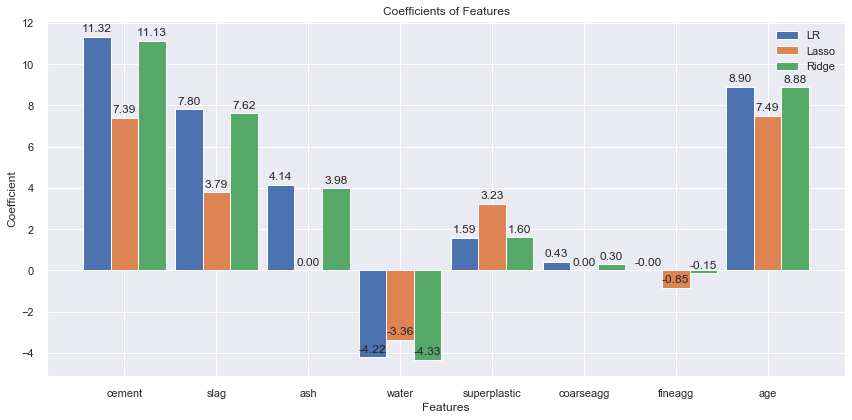

In [466]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 
labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.3 

fig, ax = plt.subplots(figsize=(12,6)) 
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR') 
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge') 
ax.set_ylabel('Coefficient') 
ax.set_xlabel('Features') 
ax.set_title('Coefficients of Features') 
ax.set_xticks(x) 
ax.set_xticklabels(labels) 
ax.legend() 

def autolabel(rects):
   for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", 
                  ha='center', va='bottom') 

autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3) 
fig.tight_layout() 
plt.show()

#### We can see that Lasso has minimized the magnitudes of coefficients, hence decreasing the sharpness in co-efficients of our test model

#### Also, Lasso Regression shows ZERO values of co-efficients of 'ash' & 'coarseagg'. 

#### Lasso has reduced the dimensionality. Lasso Model R2 score is less than Linear & Ridge Regression but as lasso has reduced dimensionality, it would be more efficient in production as it has reduced 2 features for us.

### Decission Tree Model

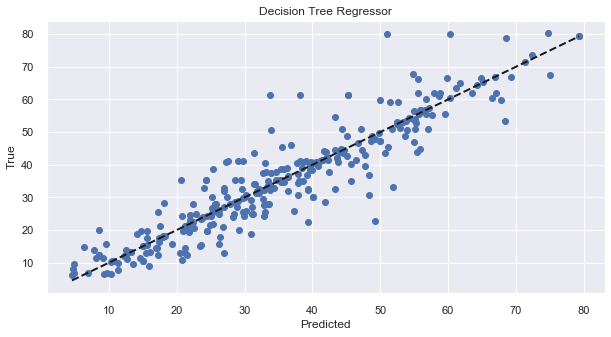

In [467]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, Y_train) 
y_pred_dtr = dtr.predict(X_test) 
plt.figure(figsize=(10,5));
plt.scatter(Y_test, y_pred_dtr) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show();

In [470]:
print(dtr.score(X_train,Y_train))
print(dtr.score(X_test,Y_test))

0.9951739931083287
0.8394888930374724


#### Decission Tree Regressor is an overfit model as Training Accuracy is 99.51% and Test Accuracy is 83.94%

#### Let's measure RMSE and R2 score for this model though

In [471]:
result.loc[3] = ['Decission Tree Regressor', np.sqrt(mean_squared_error(Y_test, y_pred_dtr)),
                r2_score(Y_test, y_pred_dtr)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70
2,Ridge Regression,8.26,0.74
3,Decission Tree Regressor,6.44,0.84


#### Decission Tree Regressor has improved RMSE & R2 Score, but it's an overfit model and not recommended for production

### Decission Tree Model using K-fold Cross Validation

In [493]:
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dtr,X, Y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8705067857065817
Standard Deviation:  0.041277430182290124


#### Test Accuracy has improved to 87.18% but it's still an overfit model

In [501]:
r2_score_dtr_kfold = cross_val_score(dtr, X, Y, scoring="r2", cv=kfold)

In [502]:
R2_Score_dtr_kfold=np.mean(abs(r2_score_dtr_kfold))

In [505]:
print('R2 Score from Decission Tree K-fold is',round(R2_Score_dtr_kfold,2))

R2 Score from Decission Tree K-fold is 0.86


In [508]:
result.loc[4] = ['Decission Tree Regressor k-fold','--', round(R2_Score_dtr_kfold,2)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70
2,Ridge Regression,8.26,0.74
3,Decission Tree Regressor,6.44,0.84
4,Decission Tree Regressor k-fold,--,0.86


### Random Forest Model

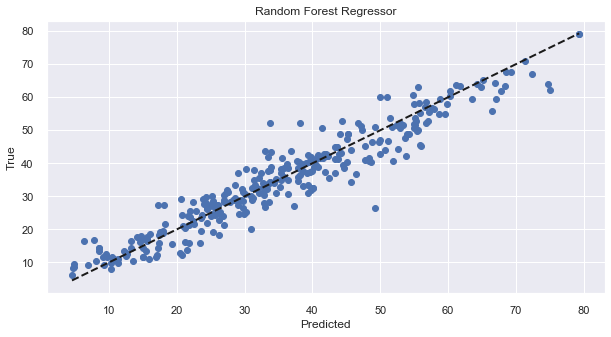

In [511]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, Y_train) 
y_pred_rfr = rfr.predict(X_test) 
plt.figure(figsize=(10,5));
plt.scatter(Y_test, y_pred_rfr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show();

In [513]:
print(rfr.score(X_train,Y_train))
print(rfr.score(X_test,Y_test))

0.9824673796225475
0.9116290720486209


#### Random Forest is not much overfit as compare to Decission Tree but it's still slightly overfit

In [514]:
result.loc[5] = ['Random Forest Regressor', np.sqrt(mean_squared_error(Y_test, y_pred_rfr)),
                r2_score(Y_test, y_pred_rfr)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70
2,Ridge Regression,8.26,0.74
3,Decission Tree Regressor,6.44,0.84
4,Decission Tree Regressor k-fold,--,0.86
5,Random Forest Regressor,4.78,0.91


#### Random Forest Regressor has further optimized RMSE and R2 score and has further optimized our model

### Random Forest K-fold Cross Validation

In [516]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(rfr,X, Y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9165557389679684
Standard Deviation:  0.024875319432375437


#### Random Forest K-Fold has slightly improved test accuracy i.e. 91.65% but it's still seems overfit as we have training accuracy as 98.24%

In [518]:
r2_score_rfr_kfold = cross_val_score(rfr, X, Y, scoring="r2", cv=kfold)

In [519]:
R2_Score_rfr_kfold=np.mean(abs(r2_score_rfr_kfold))

In [520]:
print('R2 Score from Random Forest K-fold is',round(R2_Score_rfr_kfold,2))

R2 Score from Random Forest K-fold is 0.92


In [521]:
result.loc[6] = ['Random Forest Regressor k-fold','--', round(R2_Score_rfr_kfold,2)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70
2,Ridge Regression,8.26,0.74
3,Decission Tree Regressor,6.44,0.84
4,Decission Tree Regressor k-fold,--,0.86
5,Random Forest Regressor,4.78,0.91
6,Random Forest Regressor k-fold,--,0.92


#### Random Forest Regressor k-fold has further optimized R2 score

#### Now, let's determine our feature of importance for our model.

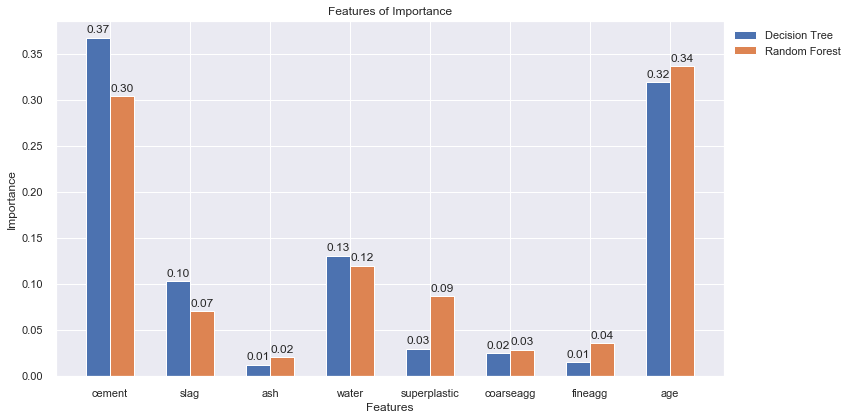

In [522]:
feature_dtr = dtr.feature_importances_ 
feature_rfr = rfr.feature_importances_ 
labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(12,6)); 
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Features of Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1) 
autolabel(rects2) 
fig.tight_layout() 
plt.show()

#### We can see that 'cement' & 'age' are the most important features. Whereas, 'ash', 'coarseagg' & 'fineagg' are least important features while predicting strength of concrete

### Gradient Boosting Regressor

In [524]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

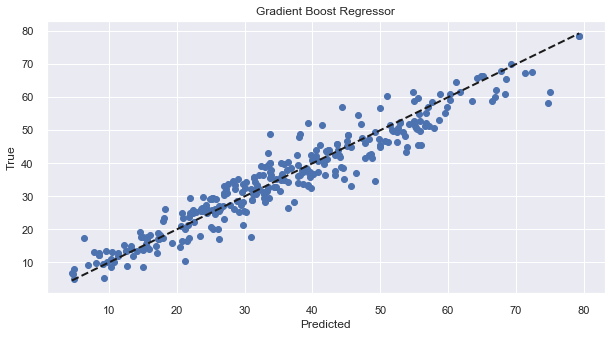

In [526]:
y_pred_gbr = gbr.predict(X_test)
plt.figure(figsize=(10,5));
plt.scatter(Y_test, y_pred_gbr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Gradient Boost Regressor") 
plt.show();

In [527]:
print(gbr.score(X_train,Y_train))
print(gbr.score(X_test,Y_test))

0.9498286086169528
0.9162409536884542


#### Gradient Boosting Regressor is not an overfit model. Let's calculate RMSE and R2 score for Gradient Boosting Regressor

In [528]:
result.loc[7] = ['Gradient Boost Regressor', np.sqrt(mean_squared_error(Y_test, y_pred_gbr)),
                r2_score(Y_test, y_pred_gbr)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70
2,Ridge Regression,8.26,0.74
3,Decission Tree Regressor,6.44,0.84
4,Decission Tree Regressor k-fold,--,0.86
5,Random Forest Regressor,4.78,0.91
6,Random Forest Regressor k-fold,--,0.92
7,Gradient Boost Regressor,4.65,0.92


#### RMSE is further optimized and so is R2 as compare to Random Forest Regressor

In [529]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(gbr,X, Y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.906950969239368
Standard Deviation:  0.018897362588571116


#### Gradient Boost Regressor K-Fold is further decreasing accuracy, so it's not a good model for this data set

In [530]:
r2_score_gbr_kfold = cross_val_score(gbr, X, Y, scoring="r2", cv=kfold)

In [531]:
R2_Score_gbr_kfold=np.mean(abs(r2_score_gbr_kfold))

In [532]:
print('R2 Score from Random Forest K-fold is',round(R2_Score_gbr_kfold,2))

R2 Score from Random Forest K-fold is 0.91


In [533]:
result.loc[8] = ['Random Forest Regressor k-fold','--', round(R2_Score_gbr_kfold,2)]
result

,Model,RMSE,R2
0,Linear Regression,8.25,0.74
1,Lasso Regression,8.81,0.70
2,Ridge Regression,8.26,0.74
3,Decission Tree Regressor,6.44,0.84
4,Decission Tree Regressor k-fold,--,0.86
5,Random Forest Regressor,4.78,0.91
6,Random Forest Regressor k-fold,--,0.92
7,Gradient Boost Regressor,4.65,0.92
8,Random Forest Regressor k-fold,--,0.91


### Hyper parameter tuning

#### Let's make use of our Feature importance and drop least important features, splitting and scaling data again and then using it in our "Gradient Boost Randomized Search CV" and "Random Forest Grid Search CV" algorithms

In [535]:
df_drop = df.drop(['ash', 'coarseagg', 'fineagg'], axis=1)

In [536]:
X = df_drop.drop("strength", axis=1)
Y = df_drop["strength"]

In [537]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [543]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### Gradient Boost Regressor Random Search CV

In [539]:
# Prepare parameter grid
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [540]:
# Perform hyper parameter tuning using Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, Y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1035 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1495 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 2022 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2699 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 3411 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 4180 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 30.5min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [560]:
mean_gb = rs.best_score_
std_gb = rs.cv_results_['mean_test_score'].std()

print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean_gb}")
print(f"Validation standard deviation: {std_gb}")
print(f"95% confidence interval: {str(round(mean_gb-(1.96*std),3)) + ' <-> ' + str(round(mean_gb+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, Y_test)}")

Mean training score: 0.9339358990082697
Mean validation score: 0.9211804893967793
Validation standard deviation: 0.035651104418255315
95% confidence interval: 0.904 <-> 0.938
Best parameters: {'subsample': 0.9, 'n_estimators': 450, 'max_leaf_nodes': 7, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.15, 'criterion': 'friedman_mse'}
Test score: 0.9403904688759556


### Random Forest Grid Search CV

In [546]:
rfr_gs = RandomForestRegressor(random_state=42)

In [553]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [555]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
CV_rfr = grid_search = GridSearchCV(estimator = rfr_gs, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
CV_rfr.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [

In [561]:
mean_rf = CV_rfr.best_score_
std_rf = CV_rfr.cv_results_['mean_test_score'].std()

#print(f"Mean training score: {CV_rfr.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean_rf}")
print(f"Validation standard deviation: {std_rf}")
print(f"95% confidence interval: {str(round(mean_rf-(1.96*std),3)) + ' <-> ' + str(round(mean_rf+(1.96*std),3))}")
print(f"Best parameters: {CV_rfr.best_params_}")
print(f"Test score: {CV_rfr.score(X_test, Y_test)}")

Mean validation score: 0.8607288534999539
Validation standard deviation: 0.00865682703962532
95% confidence interval: 0.844 <-> 0.878
Best parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
Test score: 0.8839992222107602


In [566]:
result_comp = pd.DataFrame({'Method':['Gradient Boost Randomized Search CV','Random Forest Grid Search CV'], 
                           'Mean Validation Score': [mean_gb , mean_rf], 
                           'Validation Standard Deviation': [std_gb, std_rf],
                           '95% Confidence Interval': [str(round(mean_gb-(1.96*std),3)) + ' <-> ' + str(round(mean_gb+(1.96*std),3)),
                                                      str(round(mean_rf-(1.96*std),3)) + ' <-> ' + str(round(mean_rf+(1.96*std),3))],
                           'Test Score': [rs.score(X_test, Y_test), CV_rfr.score(X_test, Y_test)]})

In [567]:
result_comp

,Method,Mean Validation Score,Validation Standard Deviation,95% Confidence Interval,Test Score
0,Gradient Boost Randomized Search CV,0.92,0.04,0.904 <-> 0.938,0.94
1,Random Forest Grid Search CV,0.86,0.01,0.844 <-> 0.878,0.88


### Gradient Boost Randomized Search CV is performing better after hyper parameter tunning because it's "Mean Validation Score", "95% Confidence Interval" & "Test Score" is better than Random Forest Grid Search CV